In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP2 - 1er cuatri 2021
En esta carpeta de Jupyter vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Métodos
Los métodos evaluados en este notebook son los siguientes:

- **VMC** : vecino mas cercano
- **AGM** : arbol generador minimo
- **I** : incersion

# Experimentos
Leemos el dataframe con todos los resultados.

In [3]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
0,ch150,150,AGM,0.808650,9315.0,0,0,0,0
1,ch150,150,VMC,0.620419,8191.0,0,0,0,0
2,ch150,150,I,946.855000,13855.0,0,0,0,0
3,berlin52,52,VMC-TS1,7.914180,8980.0,50,50,50,10
4,berlin52,52,VMC-TS1,7.971680,8980.0,100,50,50,10
...,...,...,...,...,...,...,...,...,...
322,ch150,150,VMC-TS2,7147.370000,7979.0,100,500,100,70
323,ch150,150,VMC-TS2,6821.980000,7938.0,150,500,100,70
324,ch150,150,VMC-TS2,10118.800000,7629.0,50,500,100,100
325,ch150,150,VMC-TS2,9460.840000,7624.0,100,500,100,100


In [4]:
df_resultados["metodo"] .unique()

array(['AGM', 'VMC', 'I', 'VMC-TS1', 'VMC-TS2'], dtype=object)

# Buscar parametros optimos tabu

In [5]:
df_vmc = df_resultados[(df_resultados["metodo"]== "VMC" ) & (df_resultados["dataset"] == "ch150")].copy();
df_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
1,ch150,150,VMC,0.620419,8191.0,0,0,0,0


In [7]:
df_tabu_vmc = df_resultados[(df_resultados["metodo"]== "VMC-TS1" ) & (df_resultados["dataset"] == "ch150")].copy();
df_tabu_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
272,ch150,150,VMC-TS1,9290.670,7514.0,150,500,100,100
271,ch150,150,VMC-TS1,9084.700,7516.0,100,500,100,100
253,ch150,150,VMC-TS1,3638.170,7528.0,100,200,100,100
244,ch150,150,VMC-TS1,3725.430,7543.0,100,200,50,100
263,ch150,150,VMC-TS1,9314.300,7550.0,150,500,50,100
262,ch150,150,VMC-TS1,8985.120,7556.0,100,500,50,100
270,ch150,150,VMC-TS1,9042.120,7598.0,50,500,100,100
261,ch150,150,VMC-TS1,9027.420,7599.0,50,500,50,100
254,ch150,150,VMC-TS1,3593.910,7604.0,150,200,100,100
252,ch150,150,VMC-TS1,3614.110,7626.0,50,200,100,100


In [8]:
df_tabu_vmc = df_resultados[(df_resultados["metodo"]== "VMC-TS2" ) & (df_resultados["dataset"] == "ch150")].copy();
df_tabu_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
315,ch150,150,VMC-TS2,9681.500,7464.0,50,500,50,100
326,ch150,150,VMC-TS2,9540.960,7509.0,150,500,100,100
317,ch150,150,VMC-TS2,9478.610,7549.0,150,500,50,100
299,ch150,150,VMC-TS2,3671.690,7603.0,150,200,50,100
316,ch150,150,VMC-TS2,9466.300,7613.0,100,500,50,100
306,ch150,150,VMC-TS2,3900.990,7623.0,50,200,100,100
325,ch150,150,VMC-TS2,9460.840,7624.0,100,500,100,100
307,ch150,150,VMC-TS2,3838.610,7625.0,100,200,100,100
324,ch150,150,VMC-TS2,10118.800,7629.0,50,500,100,100
308,ch150,150,VMC-TS2,3781.540,7642.0,150,200,100,100


## GAP

In [9]:
## gap = costo / optimo * 100 - 100 = gap
def gap(costo, optimo):
    return int(costo / optimo * 100 - 100)

dic_optimos = {'ch150': 6528, 'berlin52': 7542}

df_gap = df_resultados[(df_resultados["dataset"] == "berlin52") | (df_resultados["dataset"] == "ch150")].copy();
#df_gap.drop(df_gap.columns[[5,6,7,8]], axis=1, inplace=True)
list_gap = []
list_optimo = []
for index, row in df_gap.iterrows():
    costo = int(row['costo'])
    optimo = dic_optimos[row['dataset']]
    value_gap = (costo - optimo) / optimo 
    list_optimo.append(dic_optimos[row['dataset']])
    list_gap.append(value_gap)


df_gap['optimo'] = list_optimo
df_gap['gap'] = list_gap
df_gap

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
0,ch150,150,AGM,0.808650,9315.0,0,0,0,0,6528,0.426930
1,ch150,150,VMC,0.620419,8191.0,0,0,0,0,6528,0.254749
2,ch150,150,I,946.855000,13855.0,0,0,0,0,6528,1.122396
3,berlin52,52,VMC-TS1,7.914180,8980.0,50,50,50,10,7542,0.190666
4,berlin52,52,VMC-TS1,7.971680,8980.0,100,50,50,10,7542,0.190666
...,...,...,...,...,...,...,...,...,...,...,...
322,ch150,150,VMC-TS2,7147.370000,7979.0,100,500,100,70,6528,0.222273
323,ch150,150,VMC-TS2,6821.980000,7938.0,150,500,100,70,6528,0.215993
324,ch150,150,VMC-TS2,10118.800000,7629.0,50,500,100,100,6528,0.168658
325,ch150,150,VMC-TS2,9460.840000,7624.0,100,500,100,100,6528,0.167892


In [ ]:
max_iter = [50,200,500,1000]
rang_iter = [50,100,300] # tiene sentido si es menor que max
porcentaje_vecinos = [10,30,70,100]
largo_lista = [50,100,200]

In [10]:
df_gap.sort_values(by=['gap'],ascending=True).head(30)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
97,berlin52,52,VMC-TS1,489.902,7840.0,100,500,100,100,7542,0.039512
108,berlin52,52,VMC-TS1,475.106,7848.0,50,500,300,100,7542,0.040573
85,berlin52,52,VMC-TS1,508.792,7898.0,100,500,50,100,7542,0.047202
204,berlin52,52,VMC-TS2,494.476,7922.0,50,500,100,100,7542,0.050385
94,berlin52,52,VMC-TS1,338.024,7938.0,100,500,100,70,7542,0.052506
218,berlin52,52,VMC-TS2,505.796,7943.0,200,500,300,100,7542,0.053169
192,berlin52,52,VMC-TS2,496.490,7959.0,50,500,50,100,7542,0.055290
169,berlin52,52,VMC-TS2,207.224,7959.0,100,200,100,100,7542,0.055290
98,berlin52,52,VMC-TS1,485.206,7978.0,200,500,100,100,7542,0.057810
180,berlin52,52,VMC-TS2,196.101,7978.0,50,200,300,100,7542,0.057810


## Tabu search con memoria de ciclos

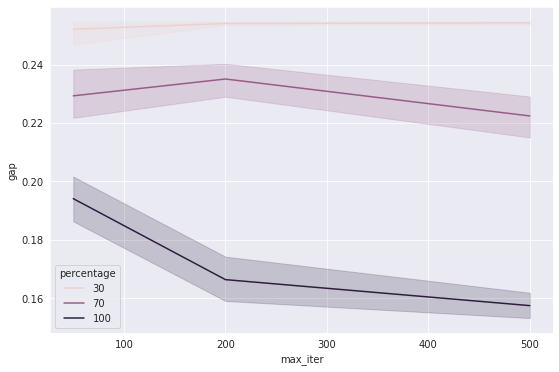

In [11]:
sns.set_style("darkgrid")
df_gap = df_gap[df_gap["dataset"] == "ch150"  ]
df = df_gap[df_gap["metodo"] == "VMC-TS1"]
plt.figure(figsize=(9,6))

sns.lineplot(data = df ,x = "max_iter",y = "gap",hue = "percentage" )
plt.show()

## Tabu search con memoria de movimientos

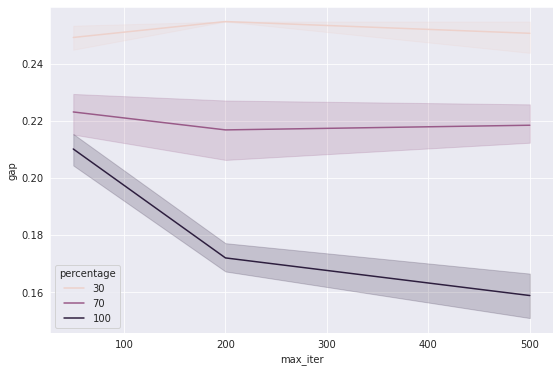

In [12]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "VMC-TS2"]
plt.figure(figsize=(9,6))

sns.lineplot(data = df ,x = "max_iter",y = "gap",hue = "percentage" )
plt.show()